
# <span style="color:rgb(213,80,0)">Segundo examen parcial semestre</span>

### **Fecha de entrega: 3 de Noviembre**
## **Semestre: 2026\-1**
### **Grupo:** 1
### **Profesor:** Erik Peña Medina
###  **Semestre:** 2025\-2
### **Nombre de los integrantes:**

**Cabrera Cruz Carlo Alejandro**


**Gutiérrez Espriella Moisés Ariel**


**González Martínez Roberto Carlos**


**Rodriguez Torres Angel Adrian**

## Resumen

En este proyecto se desarrolló y evaluó una trayectoria óptima para un manipulador SCARA, empleando un esquema de movimiento tipo *Bang\-Bang Parabolic Blend* para garantizar una transición eficiente y suavizada entre dos puntos dentro del espacio de trabajo. Como fundamento del análisis, se formularon de manera simbólica las ecuaciones de transformación homogénea correspondientes a la cinemática directa del robot, lo que permitió determinar con precisión la posición y orientación del efector final a partir de las configuraciones articulares.


La validación del modelo se realizó mediante simulación numérica en MATLAB y en el entorno ROS\-Gazebo, donde se integró un controlador basado en mensajes **JointTrajectory** implementado en Python. Esta arquitectura facilitó la ejecución continua y estable de la trayectoria, así como la verificación tridimensional del comportamiento dinámico del robot durante el seguimiento del recorrido definido.


Un elemento central del estudio fue el análisis del **índice de manipulabilidad**, empleado para evaluar la capacidad cinemática del manipulador y su desempeño frente a posibles configuraciones singulares. Los resultados obtenidos mostraron que el índice se mantuvo dentro de rangos adecuados durante toda la trayectoria, lo que confirma la viabilidad cinemática del sistema y la correcta planificación del movimiento.

## Contenido
-  Introducción
-  Descripción del problema
-  Propuesta de solución
-  Experimentos o simulaciones
-  Resultados
-  Conclusiones

## Funciones


In [1]:
clear
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]

## Introducción

La planificación de trayectorias es un componente esencial en la optimización del desempeño y la funcionalidad de robots industriales, particularmente en aplicaciones de automatización donde se requiere un control preciso y eficiente del movimiento. Su propósito principal consiste en generar los comandos necesarios para que un manipulador, en este caso un robot tipo SCARA, alcance una pose objetivo siguiendo una ruta definida dentro de su espacio de trabajo, garantizando así la correcta ejecución de una tarea específica.


Para lograrlo, la trayectoria debe cumplir con diversas restricciones tanto cinemáticas como dinámicas. Entre ellas destacan los límites articulares de posición, velocidad y aceleración, así como las capacidades de par e inercia asociadas a los actuadores. Según el objetivo del movimiento, la planificación puede orientarse hacia distintos enfoques: uno centrado en la eficiencia temporal, que busca minimizar el tiempo total del ciclo mediante la operación cercana a los límites cinemáticos; y otro orientado a la precisión, en el que se prioriza la continuidad en los perfiles de velocidad y aceleración para reducir vibraciones, minimizar el desgaste mecánico y mantener la exactitud en el posicionamiento.


Uno de los desafíos más relevantes en el diseño de trayectorias es conciliar estos dos enfoques. El movimiento rápido tiende a provocar discontinuidades en la aceleración, las cuales pueden generar vibraciones estructurales, pérdida de precisión, mayor deterioro de los componentes e incluso daños en el robot. Por ello, la planificación de trayectorias debe encontrar un equilibrio adecuado entre velocidad, precisión y durabilidad, asegurando un desempeño óptimo tanto a nivel cinemático como dinámico.

## Descripción del problema

La trayectoria *Bang\-Bang Parabolic Blend* constituye un elemento fundamental en la teoría moderna de control óptimo, ya que permite minimizar el tiempo total de desplazamiento entre dos estados mediante la aplicación de máximas aceleraciones y desaceleraciones en puntos específicos del movimiento. Este tipo de planificación se basa en un controlador *bang\-bang*, el cual alterna de manera instantánea entre dos valores extremos de una señal de control, operando de forma equivalente a un sistema conmutado tipo “on–off”. En sistemas dinámicos simplificados, la solución óptima generalmente consiste en dos fases principales —los denominados “bangs”— durante las cuales se aplica aceleración máxima seguida de desaceleración máxima para alcanzar el estado objetivo.


A pesar de su eficacia teórica, la implementación física de este tipo de control plantea desafíos relevantes. La naturaleza discontinua de la señal puede inducir errores oscilatorios alrededor del punto deseado debido a la sobrerreacción del sistema ante cambios abruptos en la entrada de control. Además, la conmutación rápida entre estados extremos puede generar efectos no deseados como picos de corriente en los actuadores, calentamiento súbito de componentes y expansión térmica en las partes metálicas del robot. Estas condiciones pueden comprometer la estabilidad del sistema, incrementar el desgaste mecánico e incluso reducir la vida útil del manipulador.

## Propuesta de solución

La generación de trayectorias tipo *Bang\-Bang Parabolic Blend* se fundamenta en la construcción de perfiles de movimiento definidos por la intersección de dos curvas parabólicas: una correspondiente a la fase de aceleración máxima y otra a la fase de desaceleración máxima. En este esquema, el robot incrementa inicialmente su velocidad mediante una aceleración constante hasta alcanzar un punto crítico o de conmutación. A partir de dicho punto, se aplica una desaceleración igualmente constante con el fin de garantizar que el efector final arribe al punto objetivo con precisión en posición y orientación.


Este enfoque permite identificar claramente los segmentos de aceleración y desaceleración que conforman la trayectoria óptima, proporcionando un perfil de movimiento temporalmente eficiente y compatible con las restricciones cinemáticas del manipulador. Con ello, se logra un control más estructurado del movimiento, facilitando la parametrización del espacio articular y permitiendo posteriormente evaluar métricas de desempeño como el índice de manipulabilidad y la factibilidad dinámica del robot durante la ejecución de la trayectoria definida.

## Hipótesis

Se plantea que es posible definir una trayectoria dentro del espacio de trabajo del manipulador SCARA que permita el desplazamiento del efector final desde un punto P1 hasta un punto P2, manteniendo durante su ejecución un índice de manipulabilidad elevado. Bajo esta hipótesis, el robot debería conservar condiciones cinemáticas favorables que eviten configuraciones cercanas a singularidades y garanticen un adecuado desempeño en términos de movilidad y control a lo largo de toda la trayectoria.

## Objetivo

Diseñar y evaluar una trayectoria tipo *Bang\-Bang Parabolic Blend* que permita al manipulador SCARA trasladar su efector final desde un punto P1 hasta un punto P2, garantizando que el índice de manipulabilidad w se mantenga dentro del rango de 0.7 a 1 durante la mayor parte de la simulación. El objetivo contempla asegurar condiciones cinemáticas favorables y evitar configuraciones próximas a singularidades durante la ejecución del movimiento.

## Metas
-  Formular el modelo cinemático directo e inverso del robot SCARA empleando transformaciones homogéneas y relaciones geométricas del manipulador.
-  Definir el tipo de trayectoria parametrizada más adecuada para el desplazamiento entre P1 y P2.
-  Establecer los parámetros estructurales del robot y del lugar geométrico de la trayectoria.
-  Determinar los parámetros variables de simulación, incluyendo tiempos de ejecución y discretización temporal.
-  Calcular el índice de manipulabilidad a lo largo de la trayectoria para evaluar la capacidad cinemática del manipulador.
-  Implementar y ejecutar la simulación del movimiento del robot mediante herramientas como MATLAB, Python y ROS\-Gazebo.
-  Analizar los resultados obtenidos a partir de gráficas, métricas cinemáticas y comportamiento simulado.
-  Elaborar conclusiones técnicas basadas en el desempeño del robot y la validez de la trayectoria propuesta.

## Planteamiento del modelo cinemático del robot

\*\*\*Modelo cinemático directo de la postura:


In [2]:
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1

T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1);
T_1_2 = Tij(L_1,0,0,0,0,theta_1_2);
T_2_3 = Tij(L_2,0,0,0,0,theta_2_3);
T_3_P = Tij(L_3,0,0,0,0,0);
T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P)

In [3]:
p_0_P=[T_O_P(1,4);T_O_P(2,4)];
xi_O_P = [p_0_P;theta_O_1+theta_1_2+theta_2_3]



## Descripción del experimento

El desarrollo de este proyecto se centra en la implementación de una trayectoria para un manipulador serial 3R dentro de un entorno tridimensional utilizando ROS. A lo largo del semestre, este proceso implicó diversos desafíos asociados al modelado geométrico, el análisis cinemático y la simulación robótica del sistema. A partir de la definición estructural del robot mediante un archivo URDF, se construyó un modelo virtual que permitió visualizar, manipular y ejecutar movimientos del manipulador en un entorno simulado de manera realista.


La formulación de los modelos matemáticos correspondientes a la cinemática directa, tanto de postura como de velocidad, permitió comprender la relación funcional entre el espacio articular y el espacio cartesiano. Adicionalmente, la solución de la cinemática inversa hizo posible obtener las configuraciones articulares necesarias para alcanzar posiciones específicas del efector final, lo cual fue verificado mediante una simulación dinámica dentro de ROS\-Gazebo.


Posteriormente, se implementó un esquema de control articular para ejecutar la trayectoria propuesta, la cual se basa en una mezcla parabólica tipo *Bang\-Bang Parabolic Blend*, descrita en el artículo **“Optimum Trajectory Function for Minimum Energy Requirements of a Spherical Robot”** \[4\]. Este enfoque define dos funciones de trayectoria válidas únicamente dentro de intervalos concretos de tiempo, determinados a partir del tiempo transcurrido de simulación y el tiempo total asignado para la ejecución. Estas funciones permiten generar el perfil de movimiento a evaluar y constituyen la base de la trayectoria utilizada en este experimento.

### $P(t)=P_0 +\frac{2\cdot t^2 }{t_f ^2 }\cdot (P_f -P_0 )$,   válida cuando   $0\le t\le \frac{t_f }{2}$
### $P(t)=P_0 +\frac{2\cdot t^2 }{t_f ^2 }\cdot (P_f -P_0 )$,   válida cuando   $0\le t\le \frac{t_f }{2}$

Para la simulación del robot se busca que el efector final pase de un punto $P_1$ a un punto $P_2$, para ello se definen los siguientes parámetros fijos del robot:

-  $\displaystyle L_1 =0.5\,[m]$
-  $\displaystyle L_2 =0.5\,[m]$
-  $\displaystyle L_3 =0.3\,[m]$

Los puntos $P_1$ y $P_2$ están definidos por:


 $P_1$:

-  $\displaystyle x_{in} =0.4\,[m]$
-  $\displaystyle y_{in} =-0.1\,[m]$

 $P_2$:

-  $\displaystyle x_{fin} =0.0\,[m]$
-  $\displaystyle y_{fin} =-1.3\,[m]$

Además, los parámetros de trayectoria son aquellos que cambian con el paso del tiempo, uno de ellos es la posición del efector final en $P_1$ y $P_2$ está dada por:


En $P_1$:

-  $\displaystyle ^p \theta_{in} =\frac{\pi }{2}\,[rad/s]$

En $P_2$:

-  $\displaystyle ^p \theta_{fin} =-\frac{\pi }{2}\,[rad/s]$

Para la simulación se propone el tiempo de total de simulación ( $t_f$ ) y el intervalo de tiempo en el que se realiza cada cambio ( $t_{in}$ ), mientras más corto sea el intervalo la simulación es más fluida:

-  $\displaystyle t_f =20\,[seg]$
-  $\displaystyle t_{in} =0.1\,[seg]$

Con esto podemos asegurar que el cálculo de la cinemática del robot durante la simulación se realizará durante un intervalo de tiempo $0\,[seg]\le t\le 20\,[seg]$ en intervalos de $0.1\,[seg]$, es decir, realizará 200 veces dicho cálculo.


A partir de los parámetros se define el lugar geométrico de trayectoria:



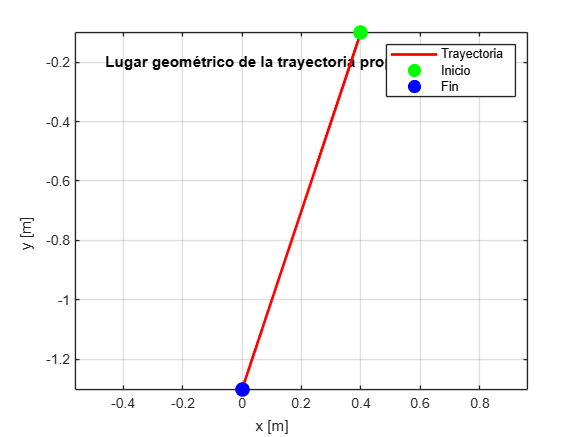

In [4]:
% Parametros del robot
L1 = 0.5;
L2 = 0.5;
L3 = 0.3;
%Punto inicial
x_in = 0.4;
y_in = -0.1;
%Punto final
x_fin = 0.0;
y_fin = -1.3;
%Definición de los parámetros de la trayectoria
t_total = 20;%s
t_in = 0.1; %S
t_sim = 0:t_in:t_total;
theta_P_1 = pi/2;
theta_P_2 = -pi/2;
% Inicialización de trayectorias
xp = zeros(size(t_sim));
yp = zeros(size(t_sim));
% Generar trayectoria Bang-Bang Parabolic Blend
for i = 1:length(t_sim)
    t = t_sim(i);
    if t <= t_total / 2
        xp(i) = x_in + (2 * t^2 / t_total^2) * (x_fin - x_in);
        yp(i) = y_in + (2 * t^2 / t_total^2) * (y_fin - y_in);
        theta_P(i) = theta_P_1 + (2 * t^2 / t_total^2) * (theta_P_2 - theta_P_1);
    else
        xp(i) = x_fin + ((4 * t / t_total - 2 * t^2 / t_total^2) - 2) * (x_fin - x_in);
        yp(i) = y_fin + ((4 * t / t_total - 2 * t^2 / t_total^2) - 2) * (y_fin - y_in);
        theta_P(i) = theta_P_2 + ((4 * t / t_total - 2 * t^2 / t_total^2) - 2) * (theta_P_2 - theta_P_1);
    end
end

% Graficar la trayectoria en el plano XY
figure;
plot(xp, yp, 'r', 'LineWidth', 2);
hold on;
plot(x_in, y_in, 'go', 'MarkerSize', 10, 'MarkerFaceColor', 'g');
plot(x_fin, y_fin, 'bo', 'MarkerSize', 10, 'MarkerFaceColor', 'b');
xlabel('x [m]');
ylabel('y [m]');
title('Lugar geométrico de la trayectoria propuesta:');
legend('Trayectoria', 'Inicio', 'Fin');
axis equal;
grid on;

## Solución de la cinemática inversa.

Para calcular el índice de manipulabilidad y garantizar que el robot siga correctamente la trayectoria propuesta, es necesario determinar primero la cinemática inversa de la postura. Dado que la trayectoria se define mediante los puntos objetivo P1 y P2, es preciso obtener las configuraciones articulares que permitan al manipulador SCARA alcanzar dichas posiciones dentro de su espacio de trabajo.


La determinación de los ángulos articulares se realiza empleando relaciones geométricas basadas en el teorema de Pitágoras, la ley de cosenos y la ley de senos, aplicadas al triángulo formado por los eslabones del robot y la proyección del punto objetivo. De esta manera, es posible calcular de forma explícita los valores de las articulaciones θ1, θ2 y θ3, garantizando que el efector final adopte la posición y orientación requeridas para cada instante de la trayectoria.

<p style="text-align:left">
   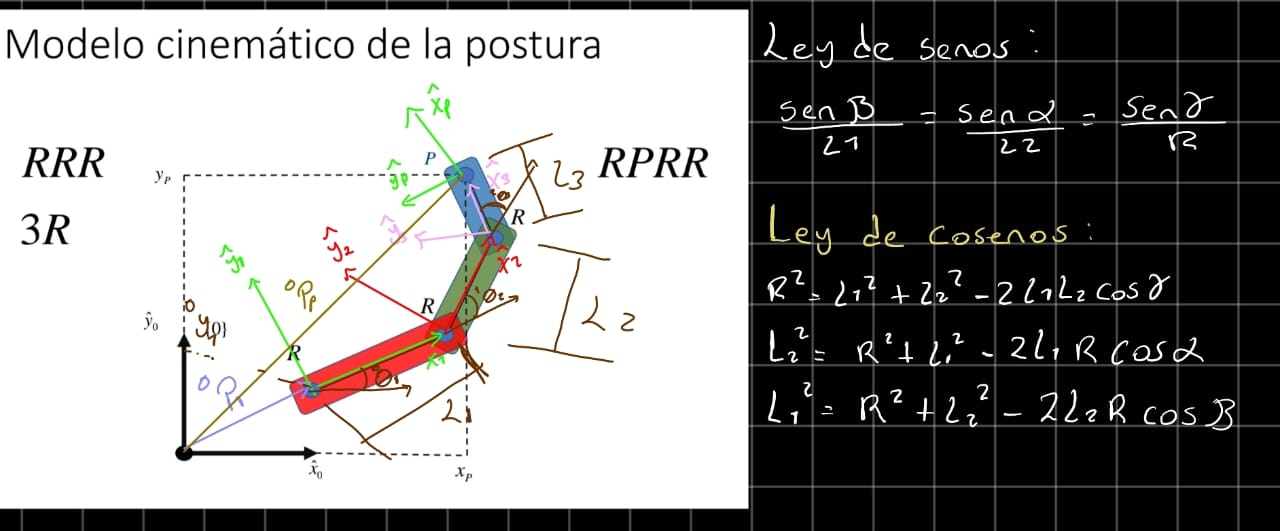
</p>



Utilizando el teorema de Pitágoras, es posible determinar la magnitud del vector R, que representa la distancia entre el sistema 1 y el sistema 2 del triángulo formado por las longitudes de los eslabones.

#### $$R=\sqrt{x_3 ^2 -y_3 ^2$$}

Para sacar el valor de theta\_1\_2, se puede ver que el valor de gamma está estrechamente relacionado, ya que la suma de los dos ángulos da Pi, en consecuencia:

#### $$\theta_2 =\pi -acos\,\left(\frac{R^2 -L_1 ^2 -L_2 ^2 }{2\cdot L_1 \cdot L_2 }\right)$$

Para encontrar la expresión de $^0 \theta_1$ se calcula el ángulo alfa ( $\alpha$ ) y Psi ( $\psi$ ).


Para alfa ( $\alpha$ ) se utiliza el triángulo rectángulo formado por el sistema de coordenadas uno y tres que pasa por el sistema dos. Para ello se emplea la definición de coseno. Este concepto se ocupa en triángulo pequeño y luego en el grande.



In [5]:
for i=1:length(t_sim)
    % Solución de la cinematica inversa de la postura del robot
    x3 = xp(i) - L3*cos(theta_P(i));
    y3 = yp(i) - L3*sin(theta_P(i));
    R = sqrt(x3^2 + y3^2);
    theta2(i) = pi-acos((R^2-L1^2-L2^2)/(2*L1*L2));
    alfa = acos((x3^2+y3^2+L1^2-L2^2)/(2*L1*sqrt(x3^2+y3^2)));
    phi = atan2(y3, x3);
    theta1(i) = alfa-phi;
    theta3(i) = theta_P(i) - theta1(i) - theta2(i);
    % calculo de w[i]
    w(i) = abs(sin(theta2(i)));
end


## Resultados

La validación de la trayectoria propuesta se llevó a cabo mediante una simulación en **ROS Visualization (RViz)**, una herramienta de representación tridimensional integrada en el entorno Robot Operating System (ROS). Esta plataforma permitió observar en tiempo real el comportamiento del manipulador SCARA, así como evaluar visualmente la correcta ejecución del movimiento dentro del espacio de trabajo.


Para la implementación del seguimiento de trayectoria, se desarrolló un script en Python encargado de generar y publicar mensajes del tipo **JointTrajectory**, los cuales fueron enviados al controlador articular del robot. Dicho código fue responsable de interpolar la trayectoria *Bang\-Bang Parabolic Blend* y traducirla a valores articulares ejecutables por el simulador, asegurando una transición continua y estable entre los distintos puntos de la trayectoria.


A continuación, se presenta el código utilizado para ejecutar el movimiento dentro del entorno ROS, el cual permitió verificar el desempeño cinemático del manipulador bajo la trayectoria definida.


\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-


\#!/usr/bin/env python3


import rclpy


from rclpy.node import Node


from trajectory\_msgs.msg import JointTrajectory, JointTrajectoryPoint


from builtin\_interfaces.msg import Duration


import time


from math import atan2, acos, cos, sin, sqrt, pow, pi


class ScaraTrayectory(Node):


&nbsp;&nbsp;&nbsp;&nbsp; def \_\_init\_\_(self):


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; super().\_\_init\_\_("scara\_trayectory\_node")


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.x\_in = 0.4


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.y\_in = \-0.1


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.theta\_P\_in = pi/2


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.x\_fin = 0.0


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.y\_fin = \-1.3


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.theta\_P\_fin = \-pi/2


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.total\_trajectory\_time = 20.0 \# segundos


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.timer\_period = 0.1 \# segundos


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.lambda\_ = 0.0


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; topic\_name = "/scara\_trajectory\_controller/joint\_trajectory"


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.trayectory\_publisher\_ = self.create\_publisher(JointTrajectory,


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; topic\_name, 10)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.joints\_ = \['link\_1\_joint', 'link\_2\_joint', 'link\_3\_joint'\]


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.timer\_ = self.create\_timer(self.timer\_period, self.timer\_callback)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.get\_logger().info('Robot SCARA ejecutando trayectoria...')


&nbsp;&nbsp;&nbsp;&nbsp; def timer\_callback(self):


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; trajectory\_msg = JointTrajectory()


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; trajectory\_msg.joint\_names = self.joints\_


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; point = JointTrajectoryPoint()


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; solution = ink\_sol(self.lambda\_, self.x\_in, self.y\_in, self.theta\_P\_in, self.x\_fin, self.y\_fin, self.theta\_P\_fin, self.total\_trajectory\_time)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; point.positions = solution


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; point.time\_from\_start = Duration(sec=1)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; trajectory\_msg.points.append(point)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.trayectory\_publisher\_.publish(trajectory\_msg)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.get\_logger().info(f'Ejecución de trayectoria: {solution}')


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; self.lambda\_ += self.timer\_period


def ink\_sol(lambda\_, x\_in, y\_in, theta\_P\_in, x\_fin, y\_fin, theta\_P\_fin, t\_total):


&nbsp;&nbsp;&nbsp;&nbsp; if lambda\_ <= t\_total:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L\_1 = 0.5


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L\_2 = 0.5


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L\_3 = 0.3


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; if lambda\_ <= t\_total / 2:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; xp = x\_in + (2 \* (lambda\_ / t\_total)\*\*2) \* (x\_fin \- x\_in)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; yp = y\_in + (2 \* (lambda\_ / t\_total)\*\*2) \* (y\_fin \- y\_in)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; theta\_P = theta\_P\_in + (2 \* (lambda\_ / t\_total)\*\*2) \* (theta\_P\_fin \- theta\_P\_in)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; else:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; xp = x\_fin + ((4 \* (lambda\_ / t\_total) \- 2 \* (lambda\_ / t\_total)\*\*2) \- 2) \* (x\_fin \- x\_in)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; yp = y\_fin + ((4 \* (lambda\_ / t\_total) \- 2 \* (lambda\_ / t\_total)\*\*2) \- 2) \* (y\_fin \- y\_in)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; theta\_P = theta\_P\_fin + ((4 \* (lambda\_ / t\_total) \- 2 \* (lambda\_ / t\_total)\*\*2) \- 2) \* (theta\_P\_fin \- theta\_P\_in)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; x\_3 = xp \- L\_3 \* cos(theta\_P)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; y\_3 = yp \- L\_3 \* sin(theta\_P)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; link\_2\_joint = acos((pow(x\_3, 2) + pow(y\_3, 2) \- pow(L\_1, 2) \- pow(L\_2, 2))/(2\*L\_1\*L\_2))


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; beta = atan2(y\_3, x\_3)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; psi = acos((pow(x\_3, 2) + pow(y\_3, 2) + pow(L\_1, 2) \- pow(L\_2, 2))/(2\*L\_1\*sqrt(pow(x\_3, 2) + pow(y\_3, 2))))


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; link\_1\_joint = beta \- psi


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; link\_3\_joint = theta\_P \- link\_1\_joint \- link\_2\_joint


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; return \[float(link\_1\_joint), float(link\_2\_joint), float(link\_3\_joint)\]


&nbsp;&nbsp;&nbsp;&nbsp; elif lambda\_ > t\_total:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; link\_1\_joint = 0.0


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; link\_2\_joint = 0.0


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; link\_3\_joint = 0.0


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; return \[float(link\_1\_joint), float(link\_2\_joint), float(link\_3\_joint)\]


def main(args=None):


&nbsp;&nbsp;&nbsp;&nbsp; rclpy.init(args=args)


&nbsp;&nbsp;&nbsp;&nbsp; node = ScaraTrayectory()


&nbsp;&nbsp;&nbsp;&nbsp; rclpy.spin(node)


&nbsp;&nbsp;&nbsp;&nbsp; rclpy.shutdown()


if \_\_name\_\_ == "\_\_main\_\_":


&nbsp;&nbsp;&nbsp;&nbsp; main()


\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-


***Resultado simulación***

<p style="text-align:left">
   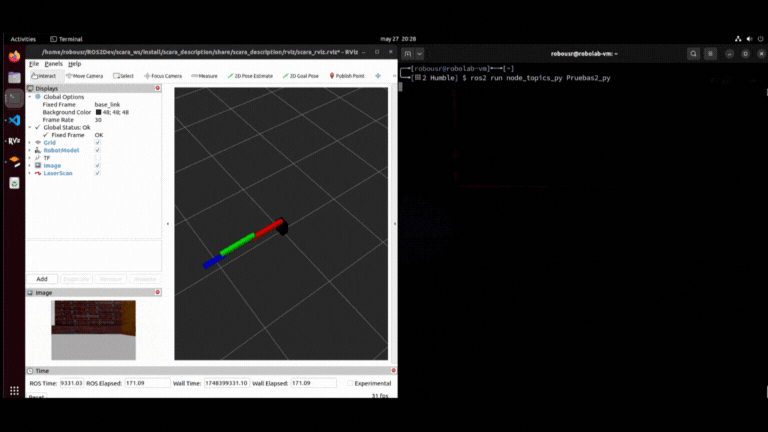
</p>


Gráficas


\*\*\*Gráfica 1



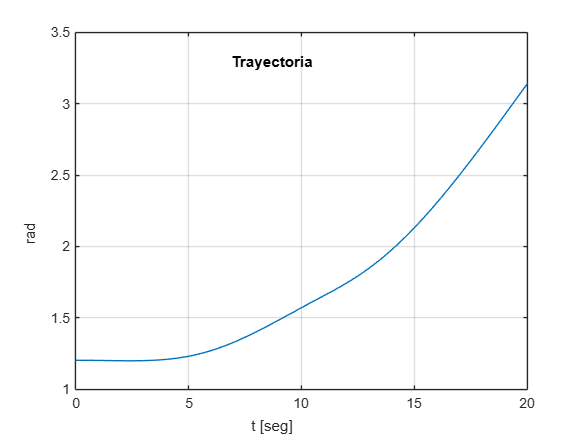

In [6]:
figure;
plot(t_sim, theta2)
hold on;
title('Trayectoria')
xlabel('t [seg]')
ylabel('rad')
grid on;


\*\*\*Gráfica 2: Índice de manipulabilidad.



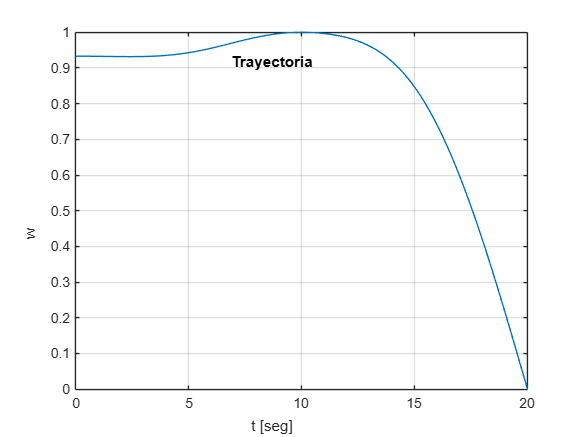

In [7]:
figure;
plot(t_sim, w)
hold on;
title('Trayectoria')
xlabel('t [seg]')
ylabel('w')
grid on;

## Conclusiones

El desarrollo de este proyecto permitió evaluar de manera integral las capacidades cinemáticas de un robot para realizar el seguimiento de una trayectoria, confirmando la hipótesis de que es posible determinar su desempeño mediante herramientas como el índice de manipulabilidad. A partir del diseño del lugar geométrico de la trayectoria y del planteamiento matemático de las ecuaciones cinemáticas y dinámicas, se identificaron las regiones de mejor y peor desempeño, así como las velocidades, torques y potencias requeridas por cada actuador. Estos resultados permitieron analizar la viabilidad del movimiento propuesto y comprender las limitaciones asociadas a configuraciones cercanas a singularidades o zonas de baja manipulabilidad.


## Conclusiones individuales

**Cabrera Cruz Carlo Alejandro**


Durante el desarrollo de este proyecto pude comprender mejor la relación entre la teoría de cinemática y su implementación práctica en un entorno de simulación. Ver el comportamiento del SCARA siguiendo la trayectoria planificada me ayudó a identificar la importancia de respetar tanto las restricciones cinemáticas como la manipulabilidad del robot. Considero que esta experiencia me acercó más al trabajo real en robótica y me dio mayor seguridad para seguir estudiando sistemas mecatrónicos avanzados.


**Gutiérrez Espriella Moisés Ariel**


El desarrollo de este proyecto permitió cumplir satisfactoriamente con el objetivo de evaluar y diseñar una tarea de seguimiento de trayectoria para un robot tipo SCARA, validando la hipótesis de que es factible determinar la viabilidad operativa de un manipulador mediante un análisis riguroso de sus capacidades cinemáticas y dinámicas antes de su implementación física.


Análisis Cualitativo y Cinemático: A través del cálculo del índice de manipulabilidad, se comprobó cualitativamente que la ubicación espacial de la tarea es un factor crítico en el desempeño del robot. Se observó que las trayectorias planificadas en el espacio de trabajo (línea recta) pueden inducir velocidades articulares excesivas si se acercan a configuraciones singulares. Sin embargo, al reubicar geométricamente la trayectoria hacia zonas de mayor manipulabilidad (isotropía), se logró suavizar el perfil de velocidades, demostrando la importancia del diseño de tareas basado en la cinemática diferencial.


Análisis Cuantitativo y Dinámico: La implementación del modelo dinámico (basado en las ecuaciones de Euler\-Lagrange) permitió cuantificar los requerimientos físicos del sistema. Al determinar el par y la potencia mecánica requerida por cada actuador, se pudo establecer un criterio objetivo para el dimensionamiento de los motores y la fuente de alimentación. Este análisis es vital para garantizar la eficiencia energética y la seguridad operativa, evitando el sobredimensionamiento costoso o la insuficiencia de par durante la ejecución de la tarea.


**González Martínez Roberto Carlos**


A través de este proyecto pude ver de manera clara cómo la teoría de manipulabilidad se relaciona directamente con el desempeño real del robot. Resolver la cinemática inversa y observar cómo respondía el SCARA en el simulador me permitió comprender mejor las limitaciones del sistema y la importancia de planear trayectorias eficientes. Este aprendizaje me motiva a seguir profundizando en temas de control y robótica aplicada.


**Rodriguez Torres Angel Adrian**


Para mí este proyecto fue una oportunidad valiosa para consolidar conocimientos de cinemática, simulación y control. Implementar la trayectoria tipo bang\-bang y analizar su efecto en la manipulabilidad del robot me hizo entender de forma más práctica cómo se toma decisiones en la robótica real. Además, trabajar con ROS y Python me ayudó a mejorar mis habilidades técnicas. En general, considero que este proyecto fortaleció mi formación como ingeniero mecatrónico.

## Referencias

\[1\] G. B. Muniyandi, “Citation: Muniyandi GB (2024) In\-Depth Analysis of Kinematic, Dynamic, and Control Aspects of a 4\-Axis SCARA Robot Manipulator,” Int J Robot Eng, vol. 7, p. 37, 2024, doi: 10.35840/2631\-5106/4137.


\[2\] C. Feng, G. Gao, and Y. Cao, “Kinematic modeling and verification for a SCARA robot,” 2016.


\[3\] B. Fernini, “Dynamic Behavior of a SCARA Robot by using N\-E Method for a Straight Line and Simulation of Motion by using Solidworks and Verification by Matlab/Simulink,” International Journal of Robotics and Automation (IJRA), vol. 3, no. 4, pp. 221–233, 2014.


\[4\] S. A. Alshahrani, H. Diken, A. A. N Aljawi, S. Alshahrani, y A. Aljawi, “OPTIMUM TRAJECTORY FUNCTION FOR MINIMUM ENERGY REQUIREMENTS OF A SPHERICAL ROBOT”, 2002.

